In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 20.1 MB/s 


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

\# 1. Fare Feature (Predictor variable): Passenger Fare.
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
train.Fare.dtypes

dtype('float64')

In [ ]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
train.Fare.describe()

count    891.000000
mean       2.943398
std        0.928574
min        1.389414
25%        2.070022
50%        2.714695
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

In [ ]:
train.Fare.isnull().sum()

0

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Fare Distributions')

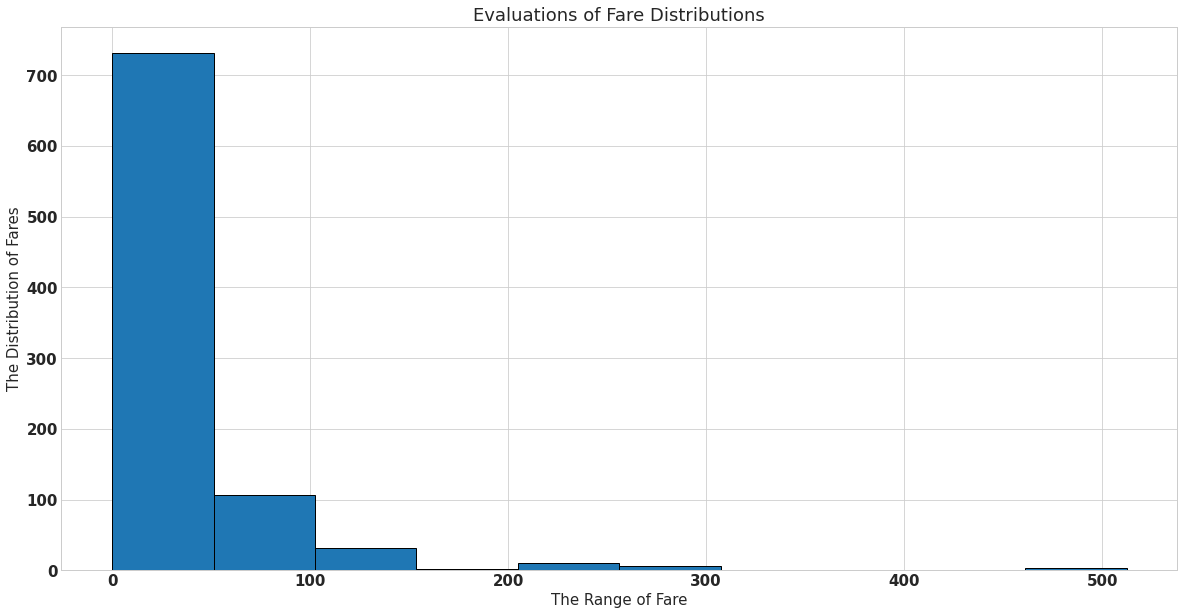

In [ ]:
train.Fare.plot.hist(edgecolor = "black", figsize=(20,10))
plt.xlabel('The Range of Fare')
plt.ylabel('The Distribution of Fares')
plt.title('Evaluations of Fare Distributions')

Text(0.5, 1.0, 'Evaluations of Fare Distributions')

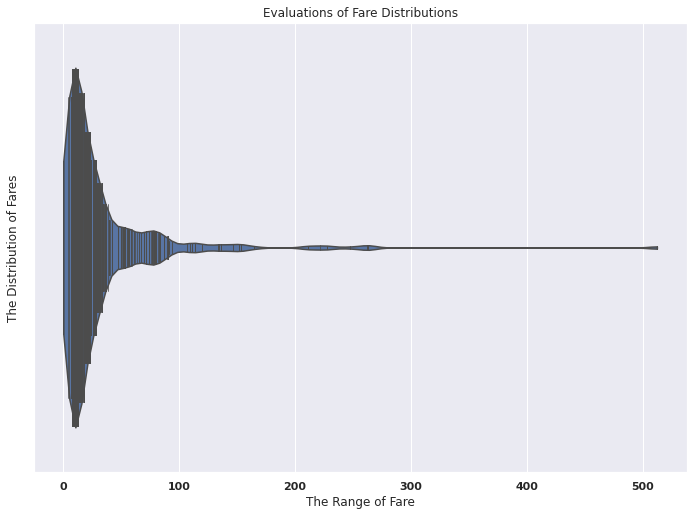

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Fare", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Fare')
plt.ylabel('The Distribution of Fares')
plt.title('Evaluations of Fare Distributions')

Text(0.5, 1.0, 'Evaluations of Fare Distributions')

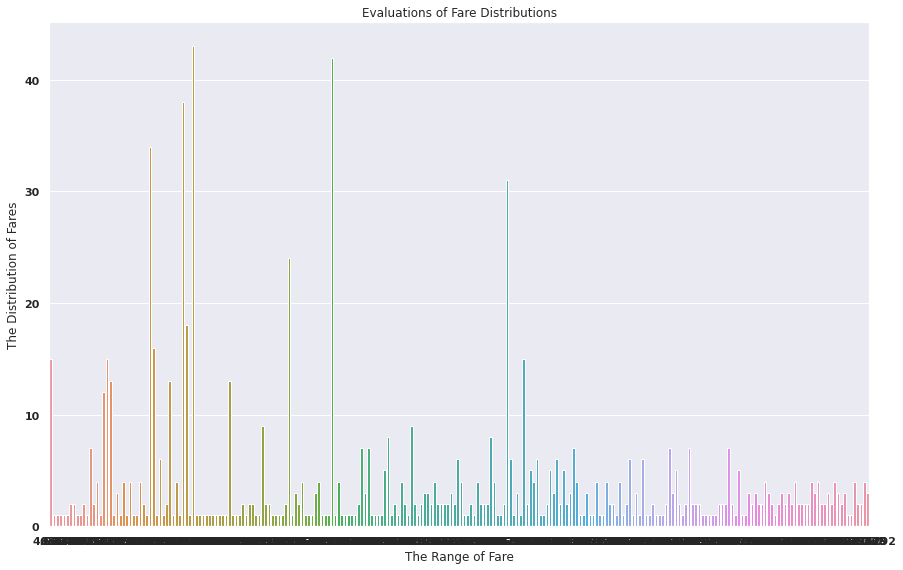

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Fare", data=train)
plt.xlabel('The Range of Fare')
plt.ylabel('The Distribution of Fares')
plt.title('Evaluations of Fare Distributions')

###Dealing with the outliers:
1. Dropping the Outliers.
2. Marking the Outliers.
3. Rescaling the Data.

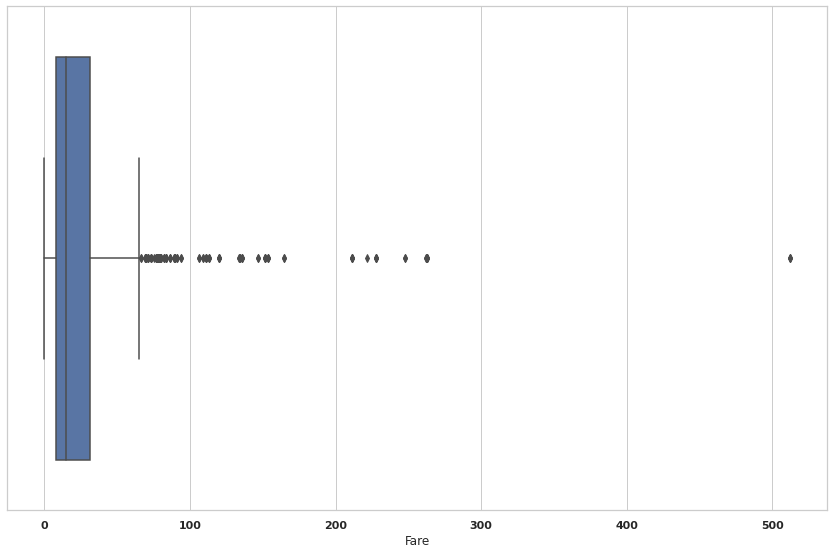

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(train.Fare)

## 2. Log transformation
> 1. Using the log transformation to make data conform to normality
The normal distribution is widely used in basic and clinical research studies to model continuous outcomes. Unfortunately, the symmetric bell-shaped distribution often does not adequately describe the observed data from research projects. Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

In [ ]:
train["Fare"] = [np.log(x) for x in train["Fare"]]
train.Fare

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

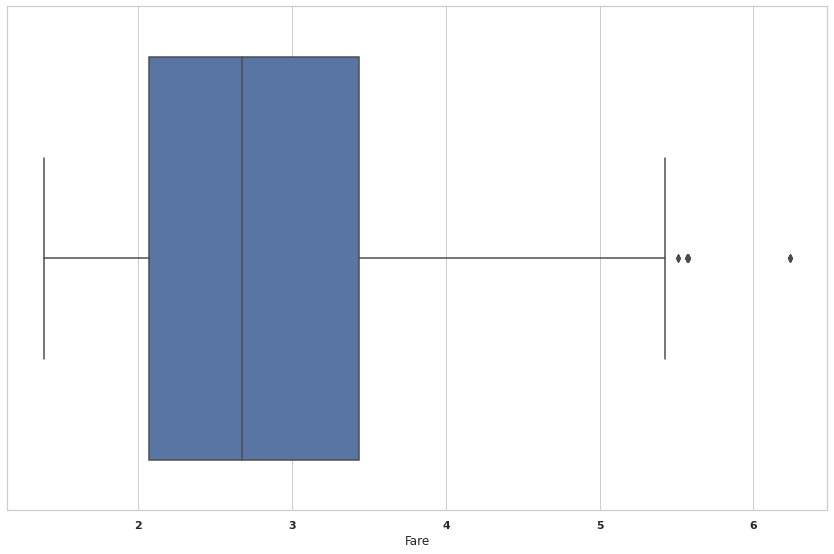

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(train.Fare)

In [ ]:
train.Fare.value_counts()

2.085672    43
2.564949    42
2.066331    38
2.047693    34
3.258097    31
            ..
3.555348     1
3.349904     1
1.830579     1
2.639057     1
2.352964     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(-0.512, 102.466]"


In [ ]:
train.Fare.nunique()

248

In [ ]:
train.Fare.unique()

array([1.98100147, 4.26666208, 2.07002232, 3.97217693, 2.08567209,
       2.13514821, 3.94859599, 3.0480875 , 2.40994062, 3.4035546 ,
       2.81540872, 3.27902975, 3.44281906, 2.06104842, 2.77258872,
       3.37159691, 2.56494936, 2.89037176, 1.97754723, 3.25809654,
       2.0830849 , 3.5695327 , 3.44640972, 5.57215403, 2.06422638,
       2.06633097, 3.32218303, 4.9871674 , 2.04769284, 2.35137526,
       4.40880001, 3.95124372, 1.97812838, 2.41963008, 2.24865675,
       3.04452244, 3.72760004, 2.74084002, 3.07635328, 2.87919846,
       3.68103628, 2.05412373, 4.34028234, 4.12679884, 3.32323584,
       3.84801768, 4.38202663, 4.42454719, 3.32862669, 2.72430406,
       2.09903581, 2.15900336, 4.29728541, 2.67098503, 4.0341663 ,
       2.03470565, 3.36729583, 2.52372664, 2.19722458, 2.2512918 ,
       2.05251988, 3.852273  , 2.7631695 , 3.53732956, 4.11373861,
       3.02407675, 3.54541893, 4.14880592, 3.13549422, 4.34753223,
       2.15804475, 2.05091346, 3.18428438, 2.28493016, 2.67126

In [ ]:
np.sort(train.Fare)

array([      -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
       1.38941449, 1.60943791, 1.83057946, 1.86214027, 1.86408013,
       1.87115581, 1.87115581, 1.9095425 , 1.9095425 , 1.9254596 ,
       1.93874166, 1.94233233, 1.94233233, 1.95243169, 1.95302762,
       1.95302762, 1.95302762, 1.95302762, 1.95302762, 1.95302762,
       1.95302762, 1.95362318, 1.95362318, 1.96360973, 1.96360973,
       1.96360973, 1.96360973, 1.96595084, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.98100147, 1.98100147, 1.98100147, 1.98100147, 1.98100

In [ ]:
# Found Infinities within the column after handling the outliers using log function.
train.Fare.replace([np.inf, -np.inf], train.Fare.mean(), inplace = True)

In [ ]:
np.sort(train.Fare)

array([1.38941449, 1.60943791, 1.83057946, 1.86214027, 1.86408013,
       1.87115581, 1.87115581, 1.9095425 , 1.9095425 , 1.9254596 ,
       1.93874166, 1.94233233, 1.94233233, 1.95243169, 1.95302762,
       1.95302762, 1.95302762, 1.95302762, 1.95302762, 1.95302762,
       1.95302762, 1.95362318, 1.95362318, 1.96360973, 1.96360973,
       1.96360973, 1.96360973, 1.96595084, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.98100147, 1.98100147, 1.98100147, 1.98100147, 1.98100147,
       1.98100147, 1.98100147, 1.98100147, 1.98100147, 1.98100147,
       1.98100147, 1.98100147, 1.98100147, 1.98958521, 2.01434286,
       2.01434286, 2.01434286, 2.01767252, 2.02154756, 2.02154

In [ ]:
train.Fare.fillna(train.Fare.mean(), inplace = True)

In [ ]:
np.sort(train.Fare)

array([1.38941449, 1.60943791, 1.83057946, 1.86214027, 1.86408013,
       1.87115581, 1.87115581, 1.9095425 , 1.9095425 , 1.9254596 ,
       1.93874166, 1.94233233, 1.94233233, 1.95243169, 1.95302762,
       1.95302762, 1.95302762, 1.95302762, 1.95302762, 1.95302762,
       1.95302762, 1.95362318, 1.95362318, 1.96360973, 1.96360973,
       1.96360973, 1.96360973, 1.96595084, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97754723, 1.97754723, 1.97754723, 1.97754723, 1.97754723,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.97812838, 1.97812838, 1.97812838, 1.97812838, 1.97812838,
       1.98100147, 1.98100147, 1.98100147, 1.98100147, 1.98100147,
       1.98100147, 1.98100147, 1.98100147, 1.98100147, 1.98100147,
       1.98100147, 1.98100147, 1.98100147, 1.98958521, 2.01434286,
       2.01434286, 2.01434286, 2.01767252, 2.02154756, 2.02154

In [ ]:
train.Fare.unique()

array([1.98100147, 4.26666208, 2.07002232, 3.97217693, 2.08567209,
       2.13514821, 3.94859599, 3.0480875 , 2.40994062, 3.4035546 ,
       2.81540872, 3.27902975, 3.44281906, 2.06104842, 2.77258872,
       3.37159691, 2.56494936, 2.89037176, 1.97754723, 3.25809654,
       2.0830849 , 3.5695327 , 3.44640972, 5.57215403, 2.06422638,
       2.06633097, 3.32218303, 4.9871674 , 2.04769284, 2.35137526,
       4.40880001, 3.95124372, 1.97812838, 2.41963008, 2.24865675,
       3.04452244, 3.72760004, 2.74084002, 3.07635328, 2.87919846,
       3.68103628, 2.05412373, 4.34028234, 4.12679884, 3.32323584,
       3.84801768, 4.38202663, 4.42454719, 3.32862669, 2.72430406,
       2.09903581, 2.15900336, 4.29728541, 2.67098503, 4.0341663 ,
       2.03470565, 3.36729583, 2.52372664, 2.19722458, 2.2512918 ,
       2.05251988, 3.852273  , 2.7631695 , 3.53732956, 4.11373861,
       3.02407675, 3.54541893, 4.14880592, 3.13549422, 4.34753223,
       2.15804475, 2.05091346, 3.18428438, 2.28493016, 2.67126